In [ ]:
from PIL import Image
import numpy
import random
import math

apple = Image.open("banner.png")
array = numpy.array(apple)


for i in range(len(array)):
    for j in range(len(array[i])):
        if array[i][j][0] > 150:
            array[i][j] = [0,min(255,2 * array[i][j][1]),min(255,2 * array[i][j][2]), 255]
        array[i][j][0] += random.uniform(-0.1, 0.1)
        array[i][j][1] += random.uniform(-0.1, 0.1)
        array[i][j][2] += random.uniform(-0.1, 0.1)
        array[i][j][3] += random.uniform(-0.1, 0.1)

apple2 = Image.fromarray(array)
apple2.show()

In [ ]:
from PIL import Image
import numpy
from Controller import converter
from Controller import slam
import cv2
import math

from matplotlib import pyplot

leftImg, rightImg = numpy.split(numpy.array(Image.open("./test1.png")), 2, axis=1)
# leftImg = numpy.array(Image.open("./undistorted_img.png"))
def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
new_K = converter.K.copy()
new_K[0][0] *= 0.5
new_K[1][1] *= 0.5
map1, map2 = cv2.fisheye.initUndistortRectifyMap(converter.K, converter.D, numpy.eye(3), new_K, (converter.imageWidth, converter.imageHeight), cv2.CV_16SC2)
undistortedLeftImg = cv2.remap(leftImg, map1, map2, interpolation=cv2.INTER_LINEAR, borderMode=cv2.BORDER_CONSTANT)
leftImg = undistortedLeftImg
leftEdgesIn, gLeftIn, rLeftIn = converter.filter(cv2.cvtColor(undistortedLeftImg, cv2.COLOR_RGB2BGR))
# show(leftBlurredIn)
# show(leftEdgesIn)
# show(cv2.cvtColor(leftImg, cv2.COLOR_BGR2HSV))

# rightImg= leftImg
# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rightEdgesIn, gRightIn, rRightIn = converter.filter(cv2.cvtColor(rightImg, cv2.COLOR_RGB2BGR))
# show(rightEdgesIn)

leftHeights, rightHeights = converter.getRawHeights(leftEdgesIn, rightEdgesIn)

imgx = 272
# 30cm: 104px
# 50cm: 100px
# 100cm: 100px
print(leftHeights[imgx])
dist = converter.wallHeight * math.sqrt((converter.focalLength ** 2) + ((imgx - converter.halfWidth) ** 2)) / leftHeights[imgx]
print(dist)
# slam.findStartingPosition(leftHeights, rightHeights)

# print(slam.carX, slam.carY)

# rLeftBlobs, gLeftBlobs, rRightBlobs, gRightBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)
# leftLandmarks = converter.getWallLandmarks(leftHeights, rLeftBlobs, gLeftBlobs)
# rightLandmarks = converter.getWallLandmarks(rightHeights, rRightBlobs, gRightBlobs)

# walls = []
# # for landmark in leftLandmarks:
# #     walls.append(converter.getDistance(landmark[0], leftHeights[landmark[0]], -1))
# # print(walls)
# # for landmark in rightLandmarks:
# #     walls.append(converter.getDistance(landmark[0], rightHeights[landmark[0]], 1))

# redBlobs = []
# # for blob in rLeftBlobs:
# #     redBlobs.append(converter.getDistance(blob[0], leftHeights[blob[0]], -1))
# # for blob in rRightBlobs:
# #     redBlobs.append(converter.getDistance(blob[0], rightHeights[blob[0]], 1))
# greenBlobs = []
# # for blob in rLeftBlobs:
# #     greenBlobs.append(converter.getDistance(blob[0], leftHeights[blob[0]], -1))
# # for blob in rRightBlobs:
# #     greenBlobs.append(converter.getDistance(blob[0], rightHeights[blob[0]], 1))
# # print(walls)
# # slam.slam(walls, redBlobs, greenBlobs)

# print(slam.carX, slam.carY, slam.carAngle)

# # print(converter.getDistance(round(converter.imageWidth / 2), leftHeights[round(converter.imageWidth / 2)], -1))
# for l in leftLandmarks:
#     for i in range(-3, 3):
#         for j in range(-3, 3):
#             leftImg[converter.wallStartLeft][l[0]] = [255, 0, 0]
# for i in range(converter.imageWidth):
#     leftImg[int(converter.wallStartLeft + leftHeights[i])][i] = [0, 255, 0]
# show(leftImg)
# show(leftEdgesIn[converter.wallStartLeft:converter.wallEnd])
# print(gLeftBlobs)
# distances = converter.getDistances(leftEdgesIn, rightEdgesIn)
# x = []
# y = []
# for i in distances:
#     # print(i)
#     if i[2] < 200:
#         x.append(i[0])
#         y.append(i[1])
# # # pyplot.xlim(-50, 50)
# # # pyplot.ylim(-50, 50)
# x.append(0)
# y.append(0)
# pyplot.axes().set_aspect('equal')
# pyplot.scatter(x, y)


[189.51317219   4.39971001 189.56423682  -1.54758464]
[251.45805111   1.20953471 251.46096008  -1.56598628]


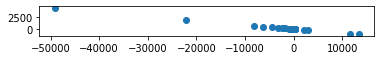

In [1]:
from PIL import Image
import numpy
from Controller import converter
from Controller import slam
import cv2
import math
import time

from matplotlib import pyplot

# leftImg, rightImg = numpy.split(numpy.array(Image.open("./undistorted_img.png")), 2, axis=1)
leftImg, rightImg = numpy.split(numpy.array(Image.open("./iamges/100.png")), 2, axis=1)
def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
leftEdgesIn, gLeftIn, rLeftIn = converter.filter(cv2.cvtColor(leftImg, cv2.COLOR_RGB2BGR))
# show(leftBlurredIn)
# show(leftEdgesIn)
# show(cv2.cvtColor(leftImg, cv2.COLOR_BGR2HSV))

# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rightEdgesIn, gRightIn, rRightIn = converter.filter(cv2.cvtColor(rightImg, cv2.COLOR_RGB2BGR))
# show(rightEdgesIn)

leftDistances, rightDistances = converter.getDistances(leftEdgesIn, rightEdgesIn)
print(leftDistances[0])

print(converter.distanceTable[0][0][10])

x = []
y = []

# print(converter.distanceTable[0])

for i in leftDistances:
    # print(i)
    if i[2] < 200:
        x.append(i[0])
        y.append(i[1])
# # pyplot.xlim(-50, 50)
# # pyplot.ylim(-50, 50)
x.append(0)
y.append(0)
pyplot.axes().set_aspect('equal')
pyplot.scatter(x, y)

In [ ]:
from PIL import Image
import numpy
from Controller import converter
from Controller import slam
import cv2
import math

from matplotlib import pyplot

# leftImg, rightImg = numpy.split(numpy.array(Image.open("./undistorted_img.png")), 2, axis=1)
leftImg = numpy.array(Image.open("./undistorted_img.png"))
def show(img):
    Image.fromarray(img).show()

# show(leftImg)

# filteredLeftImg = converter.filter(leftImg)
# leftEdgesImage, gLeftIn, rLeftIn = cv2.split(filteredLeftImg)
leftEdgesIn, gLeftIn, rLeftIn = converter.filter(cv2.cvtColor(leftImg, cv2.COLOR_RGB2BGR))
# show(leftBlurredIn)
# show(leftEdgesIn)
# show(cv2.cvtColor(leftImg, cv2.COLOR_BGR2HSV))

rightImg= leftImg
# filteredRightImg = converter.filter(rightImg)
# rightEdgesImage, gRightIn, rRightIn = cv2.split(filteredRightImg)
rightEdgesIn, gRightIn, rRightIn = converter.filter(cv2.cvtColor(rightImg, cv2.COLOR_RGB2BGR))
# show(rightEdgesIn)

# distances, croppedLeft, rawHeightsLeft = converter.getDistances(leftBlurredIn, leftEdgesIn, rightBlurredIn, rightEdgesIn)
leftHeights, rightHeights = converter.getHeights(leftEdgesIn, rightEdgesIn)
# x = round(converter.focalLength / math.sqrt(3) + converter.imageWidth / 2)
# print(leftHeights[x], x)
# x = round(converter.imageWidth / 2 - converter.focalLength * math.sqrt(3))
# print(leftHeights[x], x)
# show(croppedLeft)
# for i in rawHeightsLeft:
#     croppedLeft[i][rawHeightsLeft[i]] = 125
# show(croppedLeft)
# image = []

# slam.findStartingPosition(leftHeights, rightHeights)

# print(slam.carX, slam.carY)

# print(rawHeightsLeft)

# # # print(heights)
# # # print(left)
# # print(distances)
# x = []
# y = []
# for i in distances:
#     # print(i)
#     # if i[2] < 200:
#     x.append(i[0])
#     y.append(i[1])
# # pyplot.xlim(-50, 50)
# # pyplot.ylim(-50, 50)
# x.append(0)
# y.append(0)
# pyplot.axes().set_aspect('equal')
# pyplot.scatter(x, y)
# for i in range(len(rawHeightsLeft)):
#     print(rawHeightsLeft[i])
#     print(distances[i])

# for i in distances:
#     image.append([i[2], i[2], i[2]])
# show(numpy.array(image))
# show(numpy.concatenate(([distances], [distances], [distances]), axis=0))
# show(converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn))
rLeftBlobs, gLeftBlobs, rRightBlobs, gRightBlobs = converter.getBlobs(rLeftIn, gLeftIn, rRightIn, gRightIn)
gLeftBlobs = []
leftLandmarks = converter.getWallLandmarks(leftHeights, rLeftBlobs, gLeftBlobs)
rightLandmarks = converter.getWallLandmarks(rightHeights, rRightBlobs, gRightBlobs)
# print(rLeftBlobs, gLeftBlobs)

# walls = []
# for landmark in leftLandmarks:
#     walls.append(converter.getDistance(landmark[0], leftHeights[landmark[0]], -1))
# for landmark in rightLandmarks:
#     walls.append(converter.getDistance(landmark[0], rightHeights[landmark[0]], 1))

# redBlobs = []
# for blob in rLeftBlobs:
#     redBlobs.append(converter.getDistance(blob[0], leftHeights[blob[0]], -1))
# for blob in rRightBlobs:
#     redBlobs.append(converter.getDistance(blob[0], rightHeights[blob[0]], 1))
# greenBlobs = []
# for blob in rLeftBlobs:
#     greenBlobs.append(converter.getDistance(blob[0], leftHeights[blob[0]], -1))
# for blob in rRightBlobs:
#     greenBlobs.append(converter.getDistance(blob[0], rightHeights[blob[0]], 1))
# print(walls)
# slam.slam(walls, redBlobs, greenBlobs)

# print(slam.carX, slam.carY, slam.carAngle)

# for blob in leftBlobs:
#     cv2.circle(leftImg, (blob[0], converter.wallStartLeft), blob[1], (255, 0, 0), 1)
# for blob in rightBlobs:
#     cv2.circle(rightImg, (blob[0], converter.wallStartRight), blob[1], (255, 0, 0), 1)

# corners = cv2.goodFeaturesToTrack(leftEdgesIn, 27, 0.5, 10)
# corners = numpy.int0(corners)
# print(corners)
# print(landmarks)
# for l in corners:
#     for i in range(-3, 3):
#         for j in range(-3, 3):
#             leftImg[l[0][1] + i][l[0][0] + j] = [255, 0, 0]
print(leftLandmarks)
for l in leftLandmarks:
    # leftEdgesIn[max(round(l[1]), 0)][l[0]] = 255
    # leftEdgesIn[round(converter.imageHeight / 2 + 15 + leftHeights[l[0]]) + 2][l[0]] = 255
    for i in range(-3, 3):
        for j in range(-3, 3):
            leftImg[converter.wallStartLeft][l[0] + i] = [255, 0, 0]
#     print(l[0], converter.getDistance(l[0], leftHeights[l[0]], -1))
# for l in landmarks:
#     # leftEdgesIn[max(round(l[1]), 0)][l[0]] = 255
#     # leftEdgesIn[round(converter.imageHeight / 2 + 15 + leftHeights[l[0]]) + 2][l[0]] = 255
#     for i in range(-3, 3):
#         for j in range(-3, 3):
#             rightImg[converter.wallStartRight][l[0] + i] = [255, 0, 0]
#     print(l[0], converter.getDistance(l[0], rightHeights[l[0]], -1))

# # show(leftEdgesIn)
show(leftImg)
# outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks = converter.getLandmarks(distances, rBlobs, gBlobs)

# # for landmark in outerWallLandmarks:
# #     if landmark[2] < 30:
# #         print(landmark)
# print(outerWallLandmarks, innerWallLandmarks, rBlobLandmarks, gBlobLandmarks)

# print(converter.verticalFocalLength, converter.horizontalFocalLength)

In [ ]:
import math

horizontalFov = 155
verticalFov = 115
imageWidth = 272
imageHeight = 154
focalLength = ((imageHeight / 2) / math.tan(math.pi * (verticalFov / 2) / 180))
wallHeight = 10
centerOffset = 10
dist = wallHeight * math.sqrt(focalLength**2 + (imageWidth / 2 - 29)**2) / 36
# return (dir * (3 + a[1] * dist), (10 + a[2] * dist), dist)

print(focalLength)
dist